# Practice Exercise - Linear Regression

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [20]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load the dataset

In [22]:
df = pd.read_csv("/content/drive/MyDrive/Python Course/Supervised Learning _ Foundations/Week 1 _ Intro to Supervised Learning _ Linear Regression/Week 1 _ Practice Exercise/boston.csv")

### Check the shape of the dataset

In [4]:
df.shape

(506, 13)



*   The data contains 13 columns and 506 rows




In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Get the info regarding column datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB




*   The data consists exclusively of numerical columns (10 float and 3 int)



### Get summary statistics for the numerical columns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000




*   The median value of owner-occupied homes varies from 5K to 50K dollars
*   The mean and median of the median value of owner-occupied hopes are respectively 22.5K and 21.2K dollars
*   The mean and median of most of the columns are close suggesting approximate normal distribution of most of the attributes italicized text





**For the column `CHAS`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [23]:
df = df.replace(to_replace={'CHAS': {1: 'yes', 0: 'no'}})
df["CHAS"].unique()

array(['no', 'yes'], dtype=object)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 51.5+ KB




*   CHAS has been transformed to object type by the replacement we carried out



### Exploratory Data Analysis

**Plot the distribution plots for all the numerical features and list your observations.**

In [40]:
for col in df.columns:
    print(col)

CRIM
ZN
INDUS
CHAS
NX
RM
AGE
DIS
RAD
TAX
PTRATIO
LSTAT
MEDV


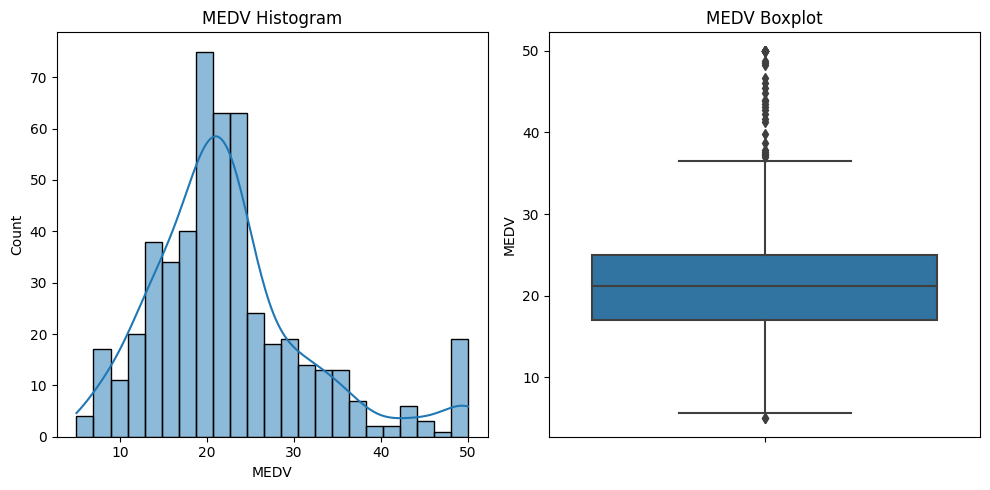

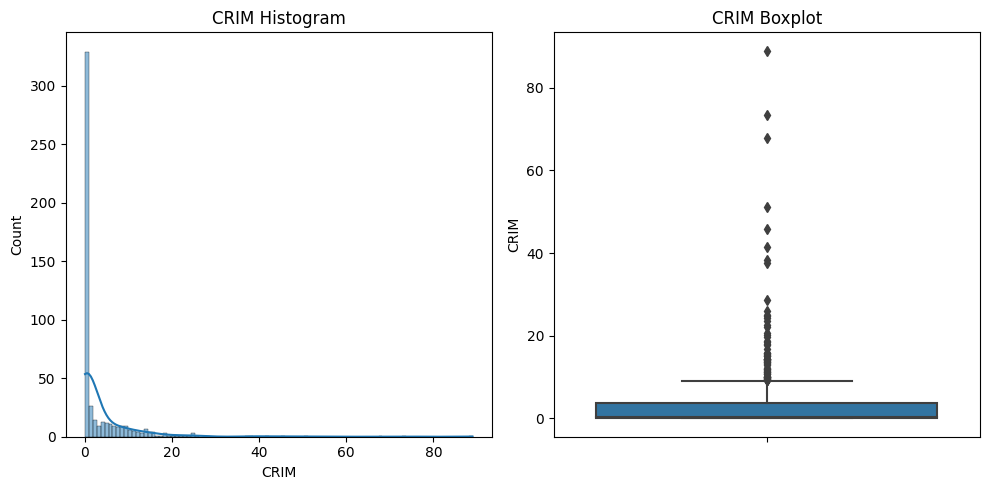

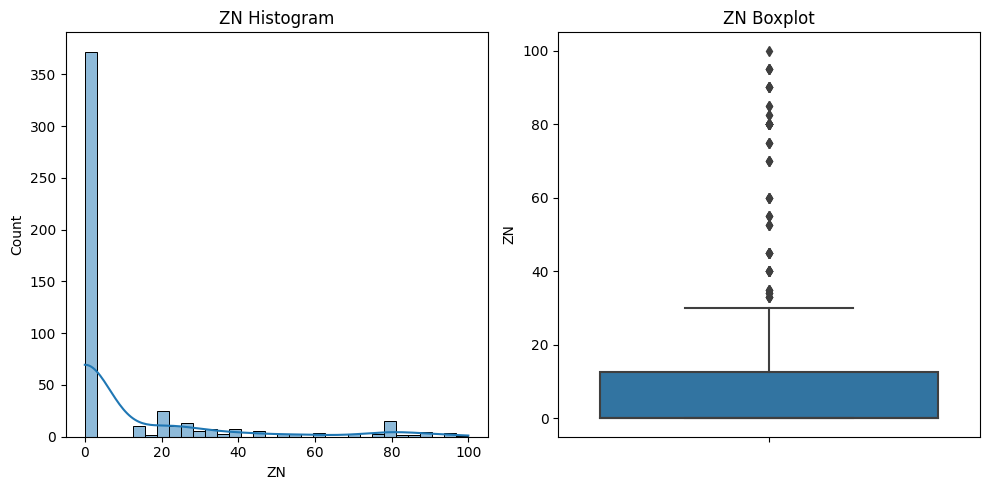

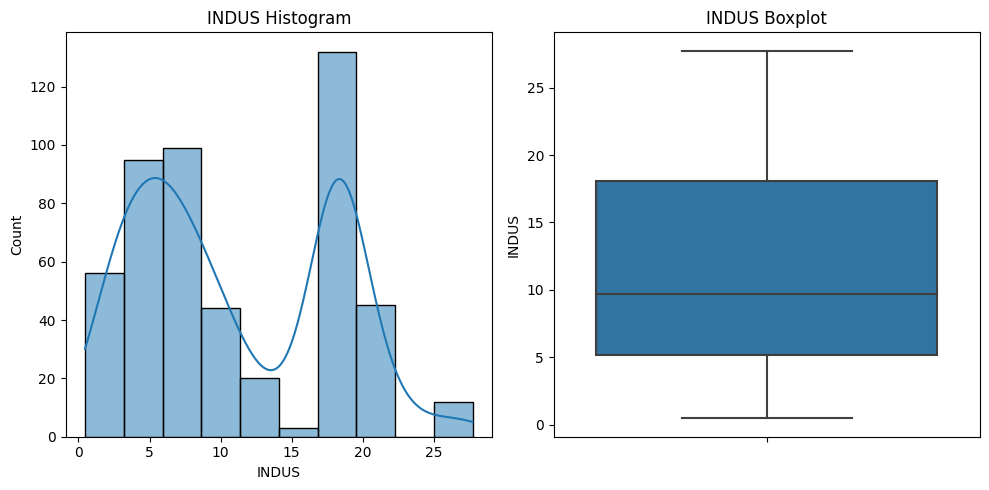

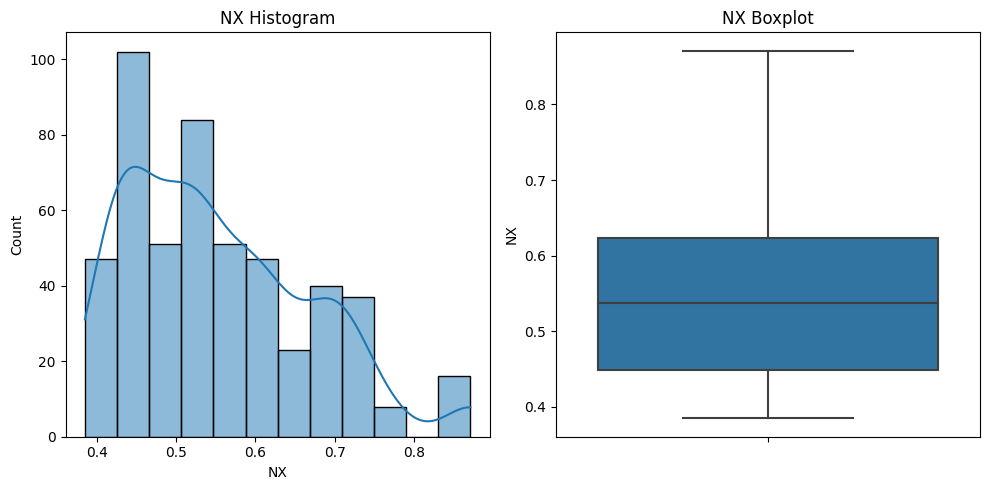

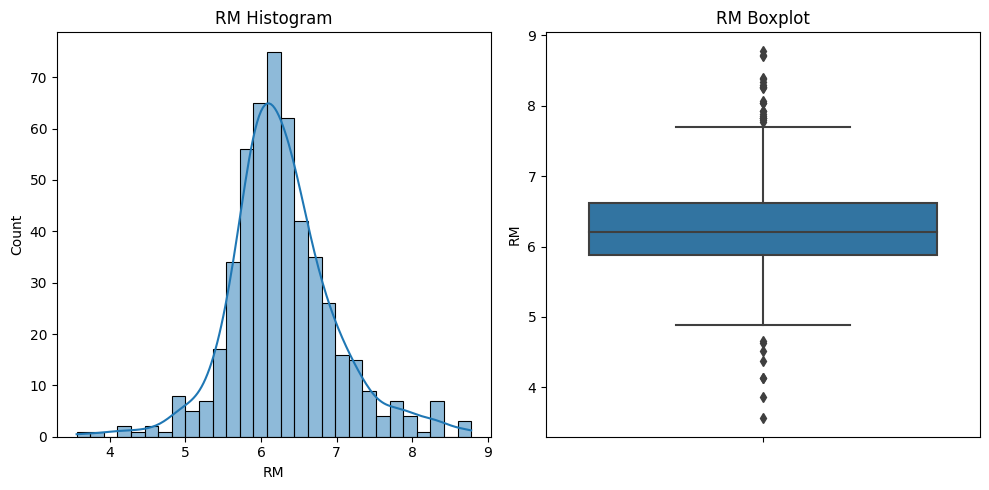

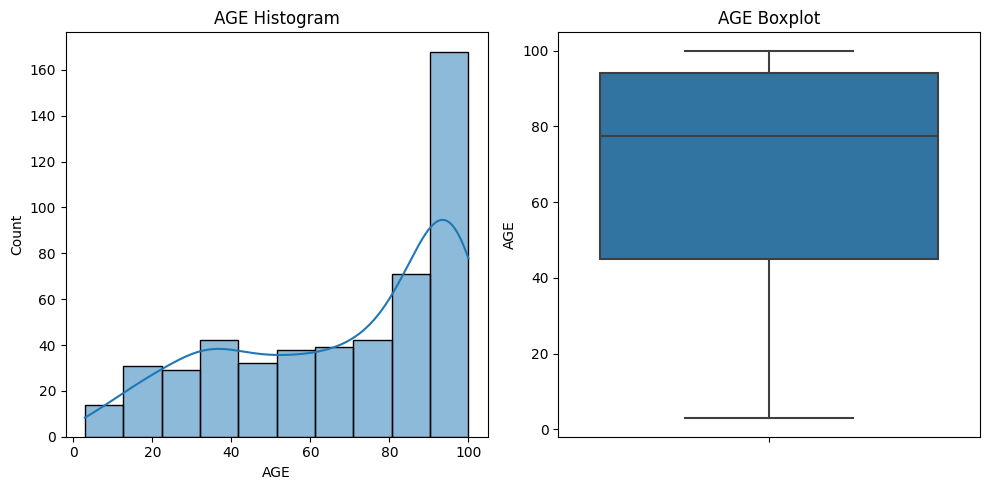

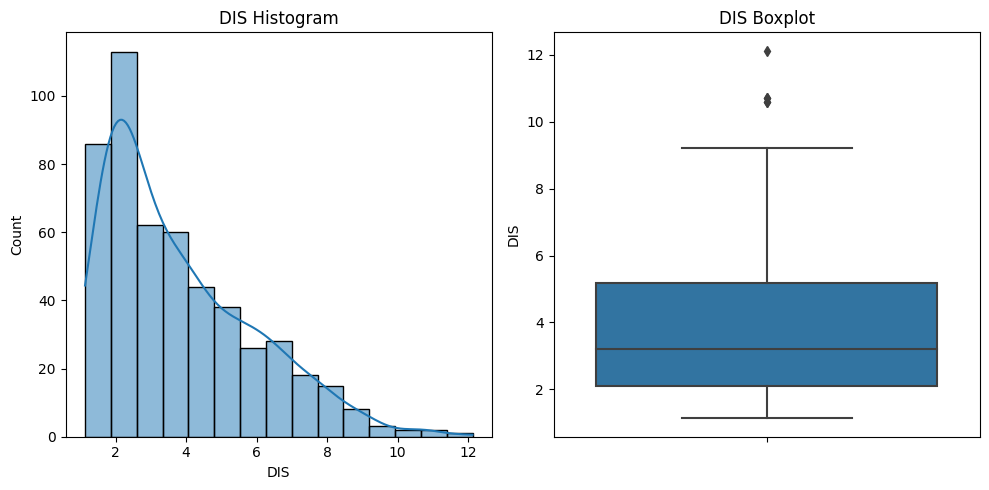

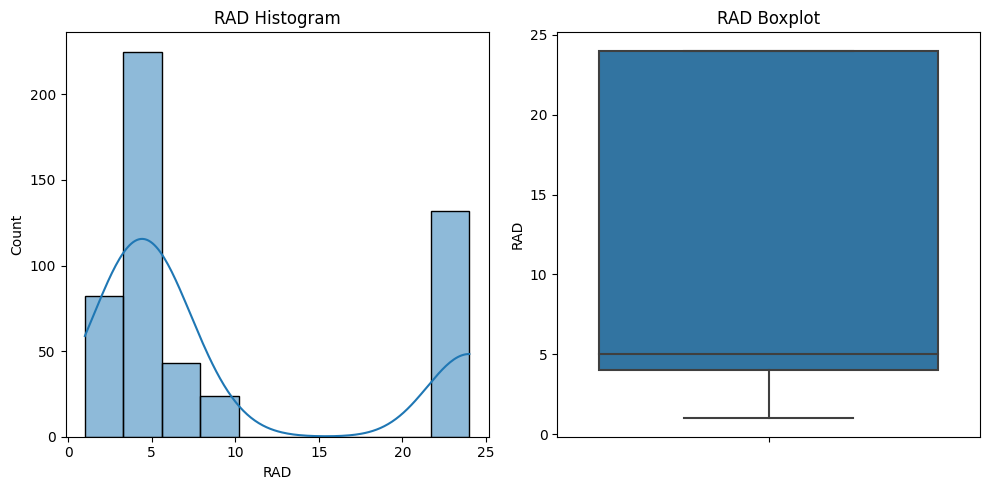

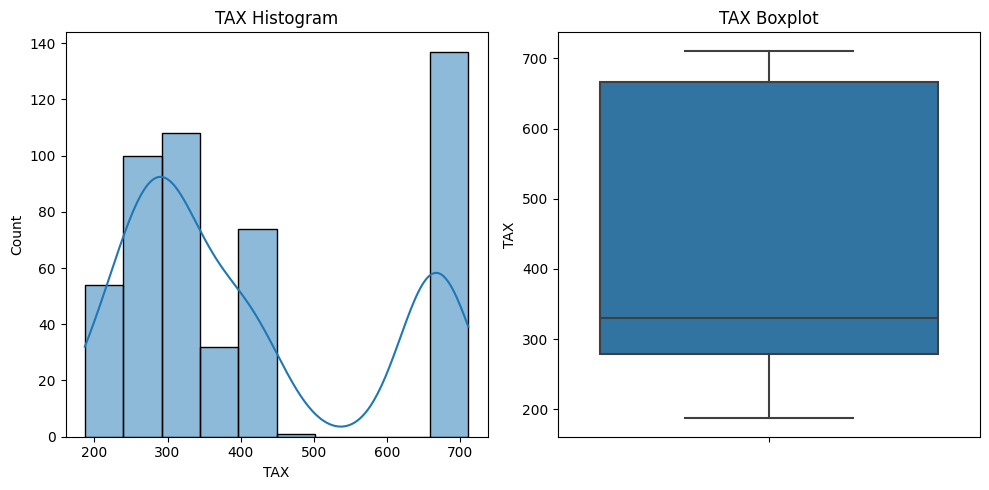

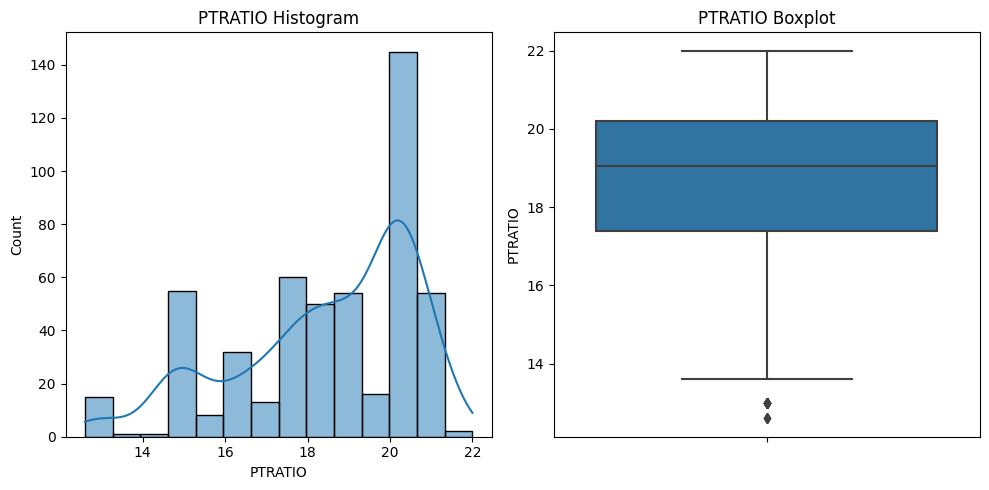

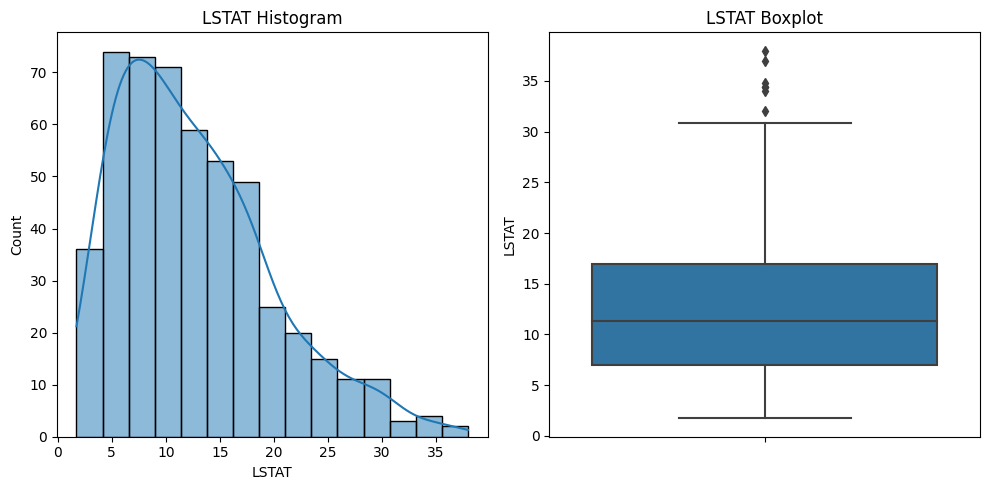

In [24]:
# Specify the numerical variables you want to plot
numerical_vars = ['MEDV', 'CRIM','ZN','INDUS','NX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']

# Loop through each numerical variable and generate the hisplot and boxplot pair
for var in numerical_vars:
    plt.figure(figsize=(10, 5))

    # Hisplot
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'{var} Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=var)
    plt.title(f'{var} Boxplot')

    plt.tight_layout()
    plt.show()


*   	The per capita crime rate by town is heavily right-skewed with several outliers
*   The proportion of residential land zoned for lots over 25,000 sq. ft. is also heavily right-skewed with several outliers
*   The proportion of non-retail business acres per town is slightly right-skewed and bimodal but has no outliers
*   The nitric oxides concentration is slightly right-skewed but has no outliers
*   The average number of rooms per dwelling is approximately normally distributed with several outliers on both sides of the distribution
*   The proportion of owner-occupied units built prior to 1940 is left-skewed with no outliers
*   The weighted distances to five Boston employment centers is right-skewed with some outliers
*   The index of accessibility to radial highways is somewhat bimodal and heavily right-skewed
*   The full-value property-tax rate per 10,000 dollars highways is also somewhat bimodal and heavily right-skewed
*   The pupil-teacher ratio by town is  left-skewed with some outliers
*   The %lower status of the population is  right-skewed with some outliers
*   The Median value of owner-occupied homes in 1000 dollars is unimodal and slightly right-skewed with some outliers

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

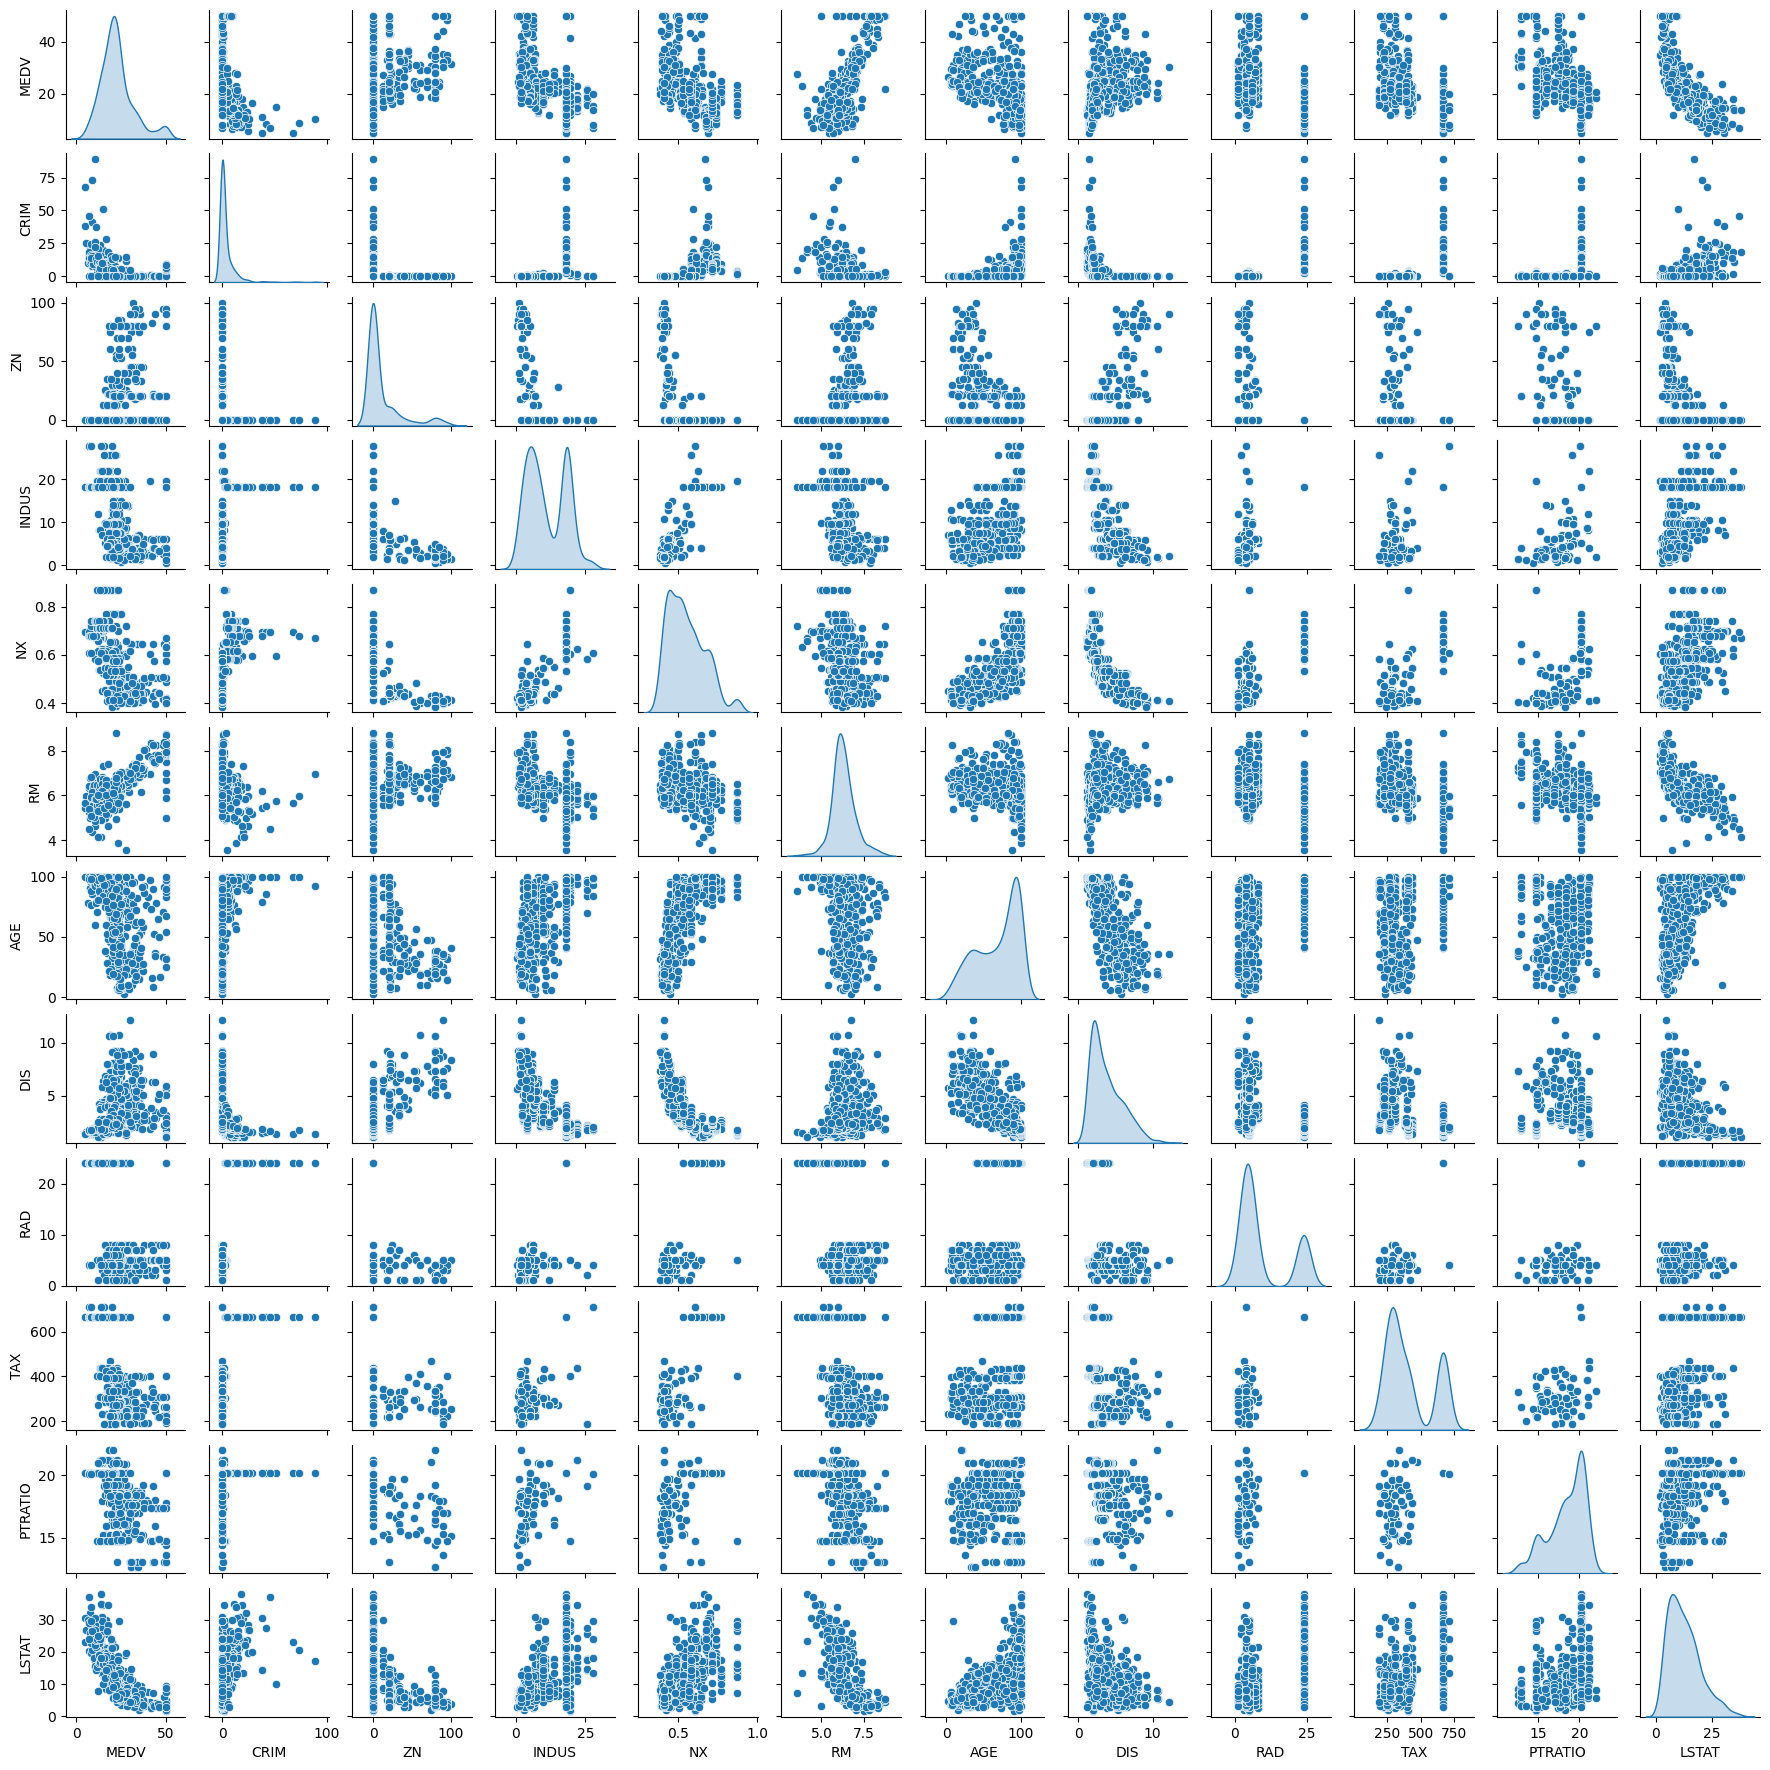

In [25]:
# list of columns
df_attr = df.loc[:, numerical_vars]

# use pairplot to plot scatter plots between the numerical variables
sns.pairplot(
    df_attr, diag_kind="kde", height=1.5
);



*   One observation that immediately jumps to the eye is that the median value of owner-occupied homes in 1000 dollars is positively correlated to the average number or rooms per dwelling and negatively correlated to the %lower status of the population



**Plot the correlation heatmap and list your observations.**

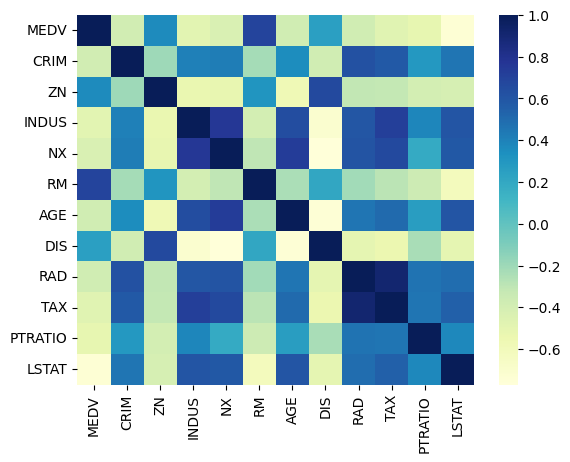

In [9]:
sns.heatmap(df_attr.corr(), cmap="YlGnBu");



*   We have confirmation that the median value of owner-occupied homes in 1000 dollars is positively correlated to the average number or rooms per dwelling and negatively correlated to the %lower status of the population
*   Moderate positive correlation observed between the the median value of owner-occupied homes in 1000 dollars on the one hand and the proportion of residential land zoned for lots over 25,000 sq. ft. and the weighted distances to five Boston employment centers on the other
*   We also have confirmation that the median value of owner-occupied homes in 1000 dollars is negatively correlated with the %lower status of the population





### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [26]:
# drop_first=True will drop one of the two CHAS columns
df = pd.get_dummies(df, columns=["CHAS"], drop_first=True)
df.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0


In [27]:
# independent variables
X = df.drop(["MEDV"], axis=1)
# dependent variable
y = df[["MEDV"]]

In [28]:
# let's add the intercept to data
X = sm.add_constant(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [15]:
print(X_train.head())

     const     CRIM    ZN  INDUS     NX     RM   AGE     DIS  RAD  TAX  \
13     1.0  0.62976   0.0   8.14  0.538  5.949  61.8  4.7075    4  307   
61     1.0  0.17171  25.0   5.13  0.453  5.966  93.4  6.8185    8  284   
377    1.0  9.82349   0.0  18.10  0.671  6.794  98.8  1.3580   24  666   
39     1.0  0.02763  75.0   2.95  0.428  6.595  21.8  5.4011    3  252   
365    1.0  4.55587   0.0  18.10  0.718  3.561  87.9  1.6132   24  666   

     PTRATIO  LSTAT  CHAS_yes  
13      21.0   8.26         0  
61      19.7  14.44         0  
377     20.2  21.24         0  
39      18.3   4.32         0  
365     20.2   7.12         0  


In [16]:
print(X_test.head())

     const     CRIM    ZN  INDUS     NX     RM   AGE     DIS  RAD  TAX  \
307    1.0  0.04932  33.0   2.18  0.472  6.849  70.3  3.1827    7  222   
343    1.0  0.02543  55.0   3.78  0.484  6.696  56.4  5.7321    5  370   
47     1.0  0.22927   0.0   6.91  0.448  6.030  85.5  5.6894    3  233   
67     1.0  0.05789  12.5   6.07  0.409  5.878  21.4  6.4980    4  345   
362    1.0  3.67822   0.0  18.10  0.770  5.362  96.2  2.1036   24  666   

     PTRATIO  LSTAT  CHAS_yes  
307     18.4   7.53         0  
343     17.6   7.18         0  
47      17.9  18.80         0  
67      18.9   8.10         0  
362     20.2  10.19         0  


### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [30]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [18]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           2.38e-83
Time:                        18:39:44   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0



*   The R-squared value tells us that our model can explain 70.7% of the variance in the training set; in other word



**Get the value of the coefficient of determination.**



*   The coefficient of determination (R-squared) is 70.7%



**Get the predictions on test set**

In [31]:
# Make predictions for test set
y_pred_test = olsres.predict(X_test)
y_pred_test

307    32.401501
343    27.887341
47     17.737617
67     21.686439
362    18.642772
         ...    
467    17.224062
95     28.670227
122    20.722891
260    33.462909
23     13.401483
Length: 152, dtype: float64

**Calculate MSE for training set**

In [32]:
# Make predictions for train set
y_pred_train = olsres.predict(X_train)

# Compute mean squared error for train set

mse_train = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", mse_train)

Mean Squared Error: 23.758095295443866




*   The mean squared error is 23.76 for the train set



**Calculate MSE for test set**

In [33]:
# Compute mean squared error for test set

mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse_test)

Mean Squared Error: 20.88178020261418




*   The mean squared error is 20.88 for the test set



**Get the RMSE on training set**

In [34]:
# Calculate the root mean squared error for the training set
rmse_train = np.sqrt(mse_train)

print("RMSE on training set:", rmse_train)

RMSE on training set: 4.874227661429436




*   The root mean squared error for the training set is 4.87



**Get the RMSE on test set**

In [35]:
# Calculate the root mean squared error for the test set
rmse_test = np.sqrt(mse_test)

print("RMSE on training set:", rmse_test)

RMSE on training set: 4.569658652745758




*   The root mean squared error for the test set is 4.57



**Automate the equation of fit**

In [36]:
equation_of_fit = f"{round(olsres.params[0], 2)} + " + " + ".join([f"{round(olsres.params[i], 2)} * {col}" for i, col in enumerate(X.columns[1:])])

print("Equation of Fit:")
print(equation_of_fit)

Equation of Fit:
49.89 + 49.89 * CRIM + -0.11 * ZN + 0.06 * INDUS + 0.05 * NX + -22.25 * RM + 2.7 * AGE + 0.0 * DIS + -1.53 * RAD + 0.3 * TAX + -0.01 * PTRATIO + -0.99 * LSTAT + -0.59 * CHAS_yes


Let's try correcting the equation above, basically by replacing i by i+1 in the olsres.params[] call of the for loop (by default, in a for i, col in enumerate() loop, i, the index, starts from 0, no matter the actual starting position of the iterable, unless the start parameter is set to another value (e.g. enumerate(..., start=1)); the col parameter will start with the value of the iterable at the starting position specified in the loop. So, depending on where your iterable starts, the match between values of i and col can vary for the default value of or any given start value of i):

In [37]:
equation_of_fit = f"{round(olsres.params[0], 2)} + " + " + ".join([f"{round(olsres.params[i+1], 2)} * {col}" for i, col in enumerate(X.columns[1:])])

print("Equation of Fit:")
print(equation_of_fit)

Equation of Fit:
49.89 + -0.11 * CRIM + 0.06 * ZN + 0.05 * INDUS + -22.25 * NX + 2.7 * RM + 0.0 * AGE + -1.53 * DIS + 0.3 * RAD + -0.01 * TAX + -0.99 * PTRATIO + -0.59 * LSTAT + 2.52 * CHAS_yes
